# I-94 Interstate highway

That project is made to get to know what is the cause of traffic on I-94 highway in US.

Goal of that project is to determine a few indicators of heavy traffic on that road and define worst hours to drive there.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import Bar, Layout
from plotly import offline

%matplotlib inline


In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

First 5 rows of the dataset.

In [3]:
traffic.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Last 5 rows of dataset

In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


`holiday`: US National holidays plus regional holiday, Minnesota State Fair <br>
`temp`: Average temp in kelvin <br>
`rain_1h`: Amount in mm of rain that occurred in the hour <br>
`snow_1h`: Amount in mm of snow that occurred in the hour <br>
`clouds_all`: Percentage of cloud cover <br>
`weather_main`: Short textual description of the current weather <br>
`weather_description`: Longer textual description of the current weather <br>
`date_time`: Hour of the data collected in local CST time <br>
`traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

Analyzing traffic volume column 

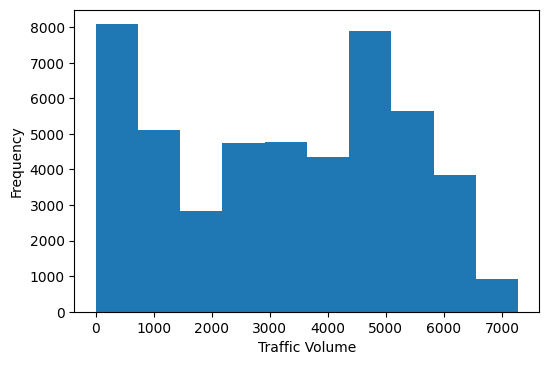

In [6]:
plt.hist(traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [7]:
traffic['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that 25% of the time, there passed 1193 cars each our and 75% of the time there were 4933 cars per hour. <br> 
The difference probably comes from a day/night circle.

Now we will separate data to Daytime(7 a.m. to 7 p.m.) and Nighttime(7 p.m. to 7 a.m.)


In [8]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])

In [9]:
day_time = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (
                                        traffic['date_time'].dt.hour < 19)]

night_time = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | 
                           (traffic['date_time'].dt.hour <7)]
print(night_time)

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
10       None  290.97      0.0      0.0          20        Clouds   
11       None  289.38      0.0      0.0           1         Clear   
12       None  288.61      0.0      0.0           1         Clear   
13       None  287.16      0.0      0.0           1         Clear   
14       None  285.45      0.0      0.0           1         Clear   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description           date_time  traffic_volume  
10                 few clouds 2012-10-02 19:00:00            3539  
11               sky is clear 2012-

Okay, we have our day/night time separated. Let's show that on a grid chart now.

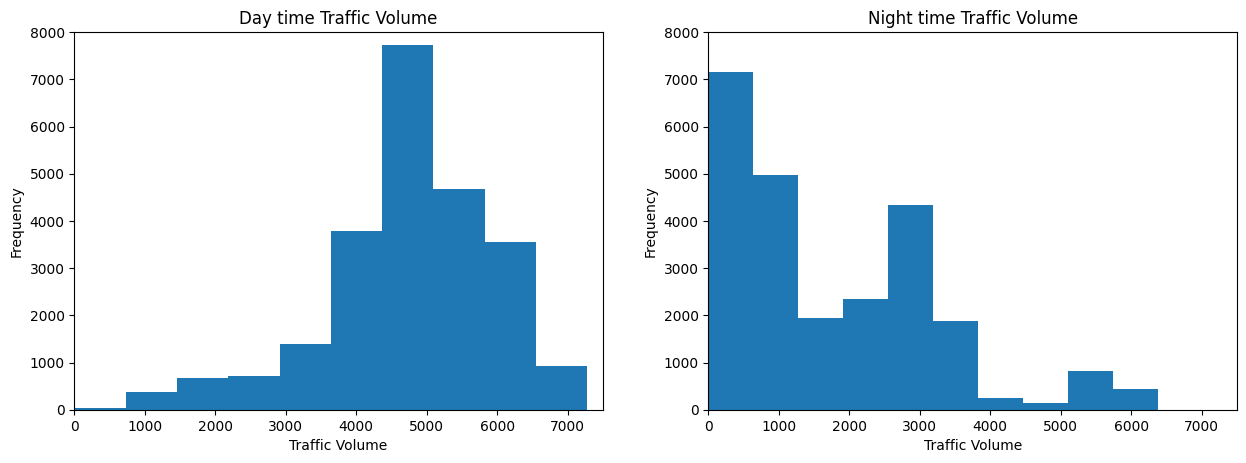

In [10]:
plt.figure(figsize=(15,5))         

plt.subplot(1,2,1)
day_time['traffic_volume'].plot.hist()
plt.title('Day time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylim([0,8000])                
plt.xlim([0,7500])

plt.subplot(1,2,2)
night_time['traffic_volume'].plot.hist()
plt.title('Night time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylim([0,8000])
plt.xlim([0,7500])                

plt.show()

In [11]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Our goal is to indicate reasons why there is a heavy traffic on I-94. As you can see during the night the mean of traffic is 3,000 less than during a day. So from now on, we will work only with day time data.

In [13]:
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Above we calculated avarage traffic by month. Let's show the results on a graph.

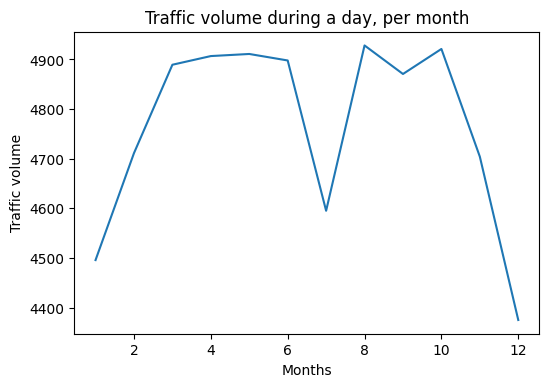

In [43]:
plt.plot(by_month['traffic_volume'])
plt.title('Traffic volume during a day, per month')
plt.xlabel('Months')
plt.ylabel('Traffic volume')
plt.show()

Looking at the line plot we can notice 3 months which has less traffic than others. It's December/January and July. I think reasons for that are simple. First of all during a winter, the weather conditions are bad but we will assume that later. People has holidays because of Christmas and they're sitting at home with their families. Two good reasons why the traffic is lighter then. What about July? Here we have similar case, most people has vacation and they prefer to lay on a beach than driving during hot days.

Let's look at traffic during a week(0 is Monday, 6 is Sunday)

In [15]:
day_time['day'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('day').mean()
by_dayofweek['traffic_volume']

day
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Nothing suprising here, during a week when people work, traffic is heavier. <br>
Let's show that on a plot line.

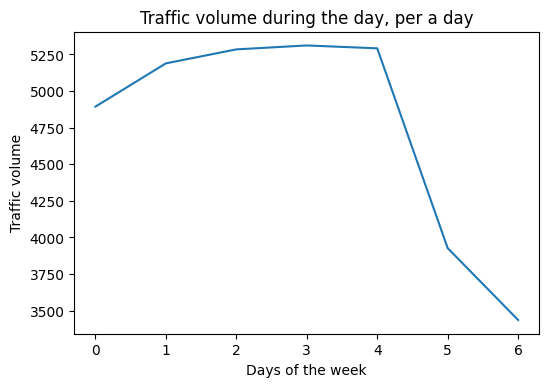

In [42]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic volume during the day, per a day')
plt.xlabel('Days of the week')
plt.ylabel('Traffic volume')
plt.show()

Last but not least, we want to know a frequency traffic each hour. But because we are working only on day time now, we separated only 7-18 time. <br>
Also we split that on Monday-Friday and Saturday, Sunday.

In [17]:
day_time['hour'] = day_time['date_time'].dt.hour
working_day = day_time.copy()[day_time['day']<=4]
weekend = day_time.copy()[day_time['day']>4]
by_hour_working_day = working_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_working_day['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


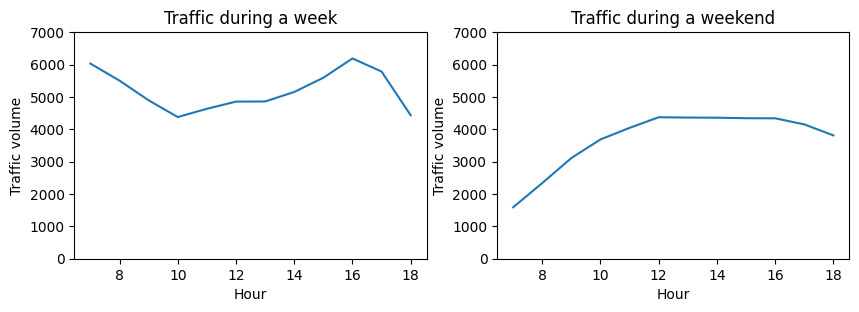

In [41]:
plt.figure(figsize=(10,3))         
plt.subplot(1,2,1)
plt.plot(by_hour_working_day['traffic_volume'])
plt.title('Traffic during a week')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')
plt.ylim([0, 7000])
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic during a weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')
plt.ylim([0, 7000])
plt.show()



Now we will go to our main goal, which is showing reasons of heavy traffic.
We will use Series.corr() function which will show us correlation of heavy traffic with weather conditions.

In [19]:
day_time_cor=day_time.corr()
day_time_cor['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day              -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We look only on weather indicatiors. As we can see, temperature has biggest correlation with traffic volume. Let's show that on a scatter graph.

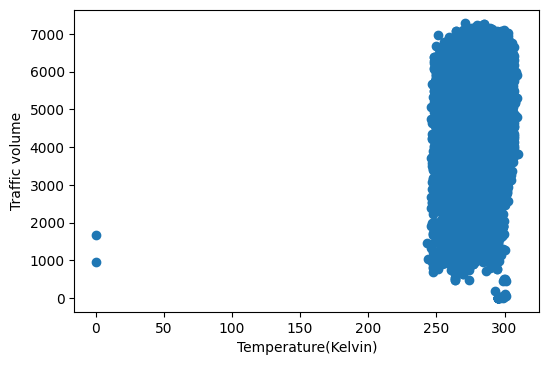

In [39]:
plt.scatter(x=day_time['temp'], y=day_time['traffic_volume'])
plt.xlabel('Temperature(Kelvin)')
plt.ylabel('Traffic volume')
plt.show()

Unfortunately we do not see much from graph. But looking at numbers, temparature has the biggest impact on heavy traffic on I-94.

In [21]:
by_weather_main=day_time.groupby('weather_main').mean()
by_weather_description=day_time.groupby('weather_description').mean()
print(by_weather_description)

                                           temp      rain_1h   snow_1h  \
weather_description                                                      
SQUALLS                              296.730000     1.020000  0.000000   
Sky is Clear                         293.232549     0.000000  0.000000   
broken clouds                        282.372927     0.000000  0.000000   
drizzle                              283.573777     0.145072  0.000000   
few clouds                           284.272965     0.000000  0.000000   
fog                                  277.579641     0.163840  0.001409   
freezing rain                        272.860000     0.000000  0.000000   
haze                                 275.319353     0.040036  0.000000   
heavy intensity drizzle              285.467931     0.276207  0.000000   
heavy intensity rain                 290.231781     2.670548  0.000000   
heavy snow                           269.256188     0.002375  0.000000   
light intensity drizzle              2

On top of that we have more specific weather conditions correlated to heavy traffic.

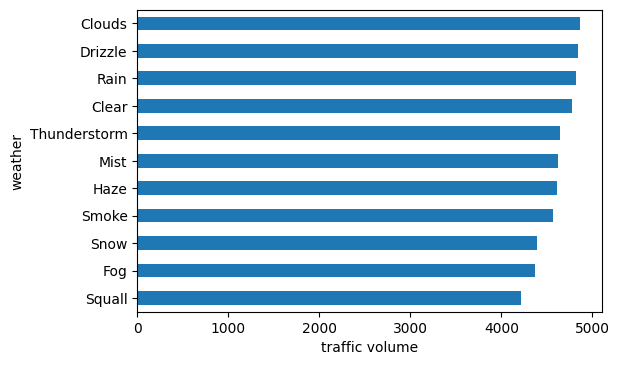

In [22]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.xlabel('traffic volume')
plt.ylabel('weather')
plt.show()

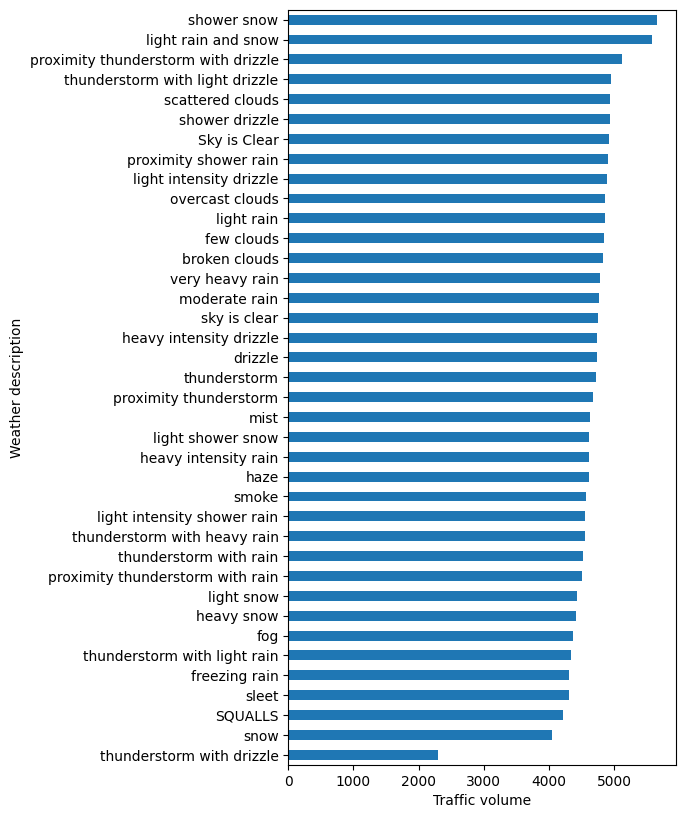

In [44]:
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(5,10))
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')
plt.show()

## Summary
To sum it up, biggest indicators of heavy traffic on I-94 Highway are shower snow and light rain and snow. Those are most common indicators which really make driving difficult and dangerous.